<a href="https://colab.research.google.com/github/Teriekarie/SGA_DSCI_2/blob/main/No_show_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# DATA WRANGLING

Here, the dataset will be loaded, cleaned and the prepared for analysis

In [3]:
df = pd.read_csv("/content/drive/MyDrive/STUTERN 1.3 ASSIGNMENT/INTERMEDIATE/Module_4/noshowappointments-kagglev2-may-2016.csv")

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Check size of dataframe
df.shape

(110527, 14)

In [6]:
# Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [8]:
# Correcting spelling names
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show':'No_show',
                   'ScheduledDay': 'Scheduled_Day', 'AppointmentDay': 'Appointment_Day', 'PatientId': 'Patient_Id', 'AppointmentID': 'Appointment_ID'}, inplace=True)

In [9]:
# Checking for null values if any
sum(df.isnull().any())

0

In [10]:
# Checking for duplicate rows in data
sum(df.duplicated())

0

In [11]:
# confirm changes
df.head()

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Change the string values of columns 'ScheduledDay' and 'AppointmentDay' to datetime object values.

In [12]:
# df['Scheduled_Day'] = pd.to_datetime(df.Scheduled_Day)
# df['Appointment_Day'] = pd.to_datetime(df.Appointment_Day)
# Convert columns types
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day']).dt.date.astype('datetime64[ns]')
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day']).dt.date.astype('datetime64[ns]')
df[['Scheduled_Day', 'Appointment_Day']].dtypes

Scheduled_Day      datetime64[ns]
Appointment_Day    datetime64[ns]
dtype: object

In [13]:
df[['Scheduled_Day', 'Appointment_Day']]

,Scheduled_Day,Appointment_Day
0,2016-04-29,2016-04-29
1,2016-04-29,2016-04-29
2,2016-04-29,2016-04-29
3,2016-04-29,2016-04-29
4,2016-04-29,2016-04-29
...,...,...
110522,2016-05-03,2016-06-07
110523,2016-05-03,2016-06-07
110524,2016-04-27,2016-06-07
110525,2016-04-27,2016-06-07


In [14]:
df['Scheduled_Day'] = df['Scheduled_Day'].dt.normalize()

In [15]:
# Check both columns - ScheduledDay and AppointmentDay after normalization
df[['Scheduled_Day', 'Appointment_Day']].head()

,Scheduled_Day,Appointment_Day
0,2016-04-29,2016-04-29
1,2016-04-29,2016-04-29
2,2016-04-29,2016-04-29
3,2016-04-29,2016-04-29
4,2016-04-29,2016-04-29


Verify that the columns 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received' have only two values 0 and 1.

In [16]:
# Check the unique values for 'Scholarship'
df.Scholarship.unique()

array([0, 1])

In [17]:
# Check the unique values for 'Hypertension'
df.Hypertension.unique()

array([1, 0])

In [18]:
# Check the unique values for 'Diabetes'
df.Diabetes.unique()

array([0, 1])

In [19]:
# Check the unique values for 'Alcoholism'
df.Alcoholism.unique()

array([0, 1])

In [20]:
# Check the unique values for 'SMS_received'
df.SMS_received.unique()

array([0, 1])

In [21]:
# Check the unique values for 'Handicap'
df.Handicap.unique()

array([0, 1, 2, 3, 4])

Setting values in the 'Handicap' column to 1 for all non-zero values.

In [22]:
# Using the loc function which takes index (row label as index) as an argument
df.loc[df[df.Handicap > 0].index, 'Handicap'] = 1
df.Handicap.unique()

array([0, 1])

In [23]:
# Check the unique values for 'No_show'
df.No_show.unique()

array(['No', 'Yes'], dtype=object)

# CONVERTING SOME VARIABLES TO BOOLEAN

This is to enable a clearer and better visualization on the graphs.

In [55]:
#changing no_show to boolean will make it easier to work with
# df["No_show"].replace({'No': 0, 'Yes': 1}, inplace = True)

# df["No_show"] = df["No_show"].astype('bool')

# Scholarship
df['Scholarship'] = df['Scholarship'].apply(lambda x: True if x==1 else False)
# Hypertension
df['Hypertension'] = df['Hypertension'].apply(lambda x: True if x==1 else False)
# Diabetes
df['Diabetes'] = df['Diabetes'].apply(lambda x: True if x==1 else False)
# Handicap
df['Handicap'] = df['Handicap'].apply(lambda x: True if x==1 else False)
# Alcoholism
df['Alcoholism'] = df['Alcoholism'].apply(lambda x: True if x==1 else False)
# SMS_received
df['SMS_received'] = df['SMS_received'].apply(lambda x: True if x==1 else False)
# No_Show
df['No_Show'] = df['No_show'].apply(lambda x: True if x=='Yes' else False)

In [56]:
# Check the unique values for 'No_show'
df.No_show.unique()

array([False,  True])

In [57]:
df.dtypes

Patient_Id                float64
Appointment_ID              int64
Gender                     object
Scheduled_Day      datetime64[ns]
Appointment_Day    datetime64[ns]
Age                       float64
Neighbourhood              object
Scholarship                  bool
Hypertension                 bool
Diabetes                     bool
Alcoholism                   bool
Handicap                     bool
SMS_received                 bool
No_show                      bool
Days_To_Wait                int64
AgeGroup                 category
No_Show                      bool
dtype: object

In [58]:
# Get descriptive summary of data
df.describe()

,Patient_Id,Appointment_ID,Age,Days_To_Wait
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000
mean,1.474935e+14,5.675305e+06,37.089386,10.184253
std,2.560866e+14,7.129722e+04,23.109780,15.255115
min,3.921784e+04,5.030230e+06,0.000000,0.000000
25%,4.172536e+12,5.640284e+06,18.000000,0.000000
50%,3.173700e+13,5.680574e+06,37.000000,4.000000
75%,9.439277e+13,5.725525e+06,55.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,179.000000



*   From the descriptive summary table it appears that the columns 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received' have only two values as 0 (min) and 1 (max).
*   Column 'Age' has a minimum value of -1 which is not possible and hence needs to be corrected with say, we can replace the negative value with the mean age value.





Check to see if there are any entries of 'AppointmentDay' which are prior to the 'Scheduled_Day'.

In [59]:
df[df['Appointment_Day'] < df['Scheduled_Day']]

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Days_To_Wait,AgeGroup,No_Show


To verify the waitng period for a patient

In [60]:
df['Days_To_Wait'] = df['Appointment_Day'] - df['Scheduled_Day']
df['Days_To_Wait'].head()

0   0 days
1   0 days
2   0 days
3   0 days
4   0 days
Name: Days_To_Wait, dtype: timedelta64[ns]

Changing 'Days_To_Wait' column values to integer values.

In [61]:
df['Days_To_Wait'] = (df['Days_To_Wait'].apply(lambda x: str(x))).apply(lambda x: x.split(" ")[0])
df['Days_To_Wait'] = df['Days_To_Wait'].apply(lambda x: int(x))

In [62]:
# Check the changes for 'Days_To_Wait' column values
df.dtypes

Patient_Id                float64
Appointment_ID              int64
Gender                     object
Scheduled_Day      datetime64[ns]
Appointment_Day    datetime64[ns]
Age                       float64
Neighbourhood              object
Scholarship                  bool
Hypertension                 bool
Diabetes                     bool
Alcoholism                   bool
Handicap                     bool
SMS_received                 bool
No_show                      bool
Days_To_Wait                int64
AgeGroup                 category
No_Show                      bool
dtype: object

In [63]:
# checking if there are days less than 0
df[df['Days_To_Wait'] < 0]

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Days_To_Wait,AgeGroup,No_Show


In [64]:
# Drop rows for which 'Days_To_Wait' value is negative
df.drop(df[df['Days_To_Wait'] < 0].index, inplace=True)

# Correct the negative age value
Updating all the negative values in the 'Age' column with mean age value.


In [65]:
# Rows containing negative age values
df[df.Age < 0]


,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Days_To_Wait,AgeGroup,No_Show


In [66]:
# Using loc function which takes label (index label) as an argument to update with mean value
df.loc[99832, 'Age'] = df.Age.mean()

# Cross check for any negative values
df[df.Age < 0]

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Days_To_Wait,AgeGroup,No_Show


# DATA EXPLORATORY

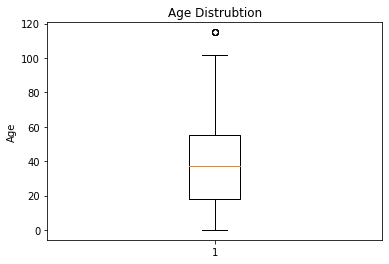

In [36]:
fig, ax = plt.subplots()
bp = ax.boxplot(df["Age"])
ax.set_title('Age Distrubtion')
ax.set_ylabel('Age')
plt.show()

#from the below boxplot, we can see that -1 and 115 are considered as outliers which mostly between 0 and 102

Text(0.5, 1.0, 'Age Distribution')

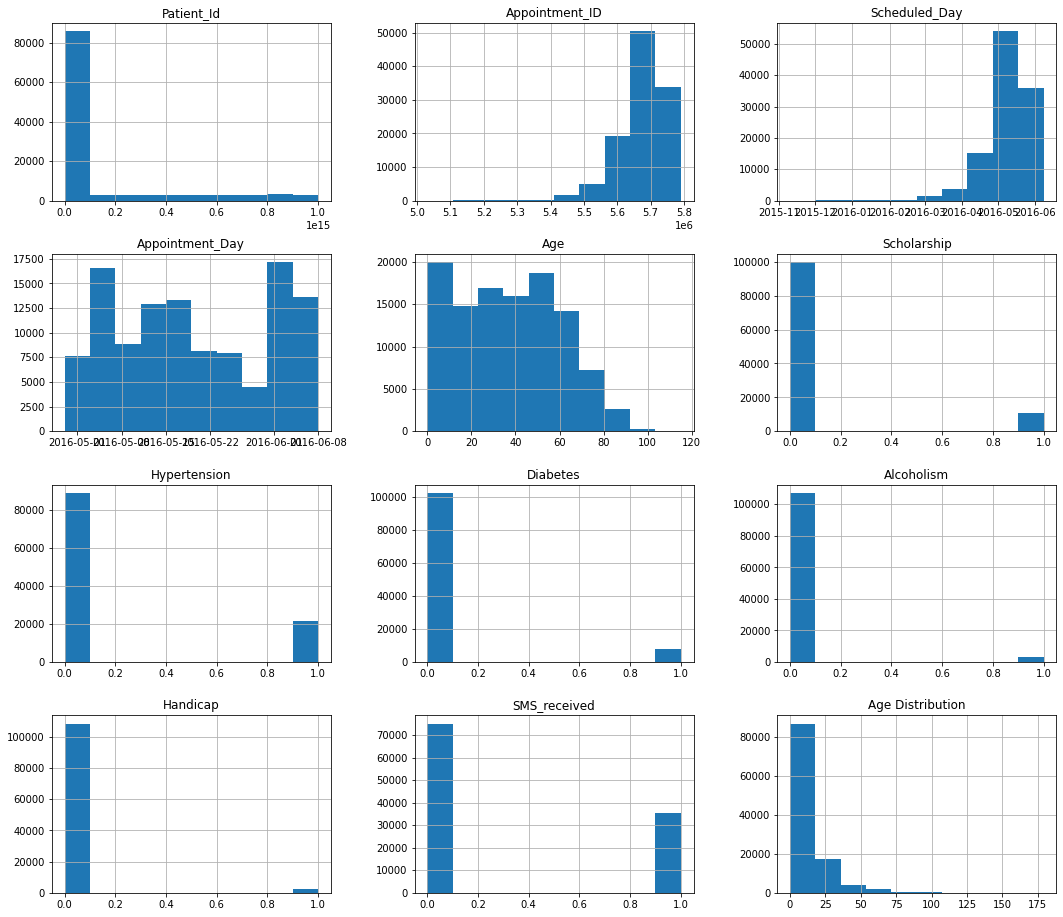

In [37]:
df.hist(figsize=(18,16));
plt.title('Age Distribution')

from the above histgrams, we can see the followings:

*  Age:we have alot of young patients(age 0,1) but the rest of the patients age 
is distributed evenly with less patients older than 60 years.
*   Alcoholism: Most of the patients are not alcoholics.
*   Diabetes: Most of the patients don't have diabetes but it slightly more than alcoholics ratio and handicap.
*  Scholarship:Most of the patients didn't receive Scholarship but it slightly more than alcoholics ratio and handicap




Research Question 1 (Demographics Features effect) (Does Age, Gender and neighbourhood affect the no-show ratio)

The number of missed appointmentsis 22314


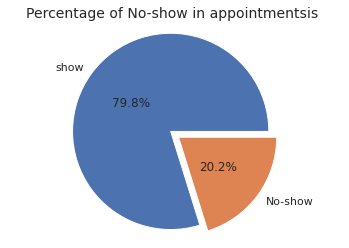

In [54]:
#from the below pie chart, we can see that 20% of the appointments are missed
print("The number of missed appointmentsis {}".format(df.query("No_show==1")["No_show"].sum()))
labels=["show","No-show"]
plt.pie(df["No_show"].value_counts(),autopct='%.1f%%',labels=labels, pctdistance=0.5, explode=[0.1, 0])
plt.axis('equal')
plt.title("Percentage of No-show in appointmentsis ", fontsize=14);
plt.show()

20 % of all the medical appointments result in no show

In [39]:
# create age groups 
bins= [0,10,19,26,36,46,56,66,150]
labels = ['Less than 10','10-18','19-25','26-35','36-45','46-55','56-65','More than 65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.groupby(['AgeGroup'])['Patient_Id'].count()

AgeGroup
Less than 10    17474
10-18           11391
19-25            9731
26-35           14404
36-45           14582
46-55           15437
56-65           14203
More than 65    13300
Name: Patient_Id, dtype: int64

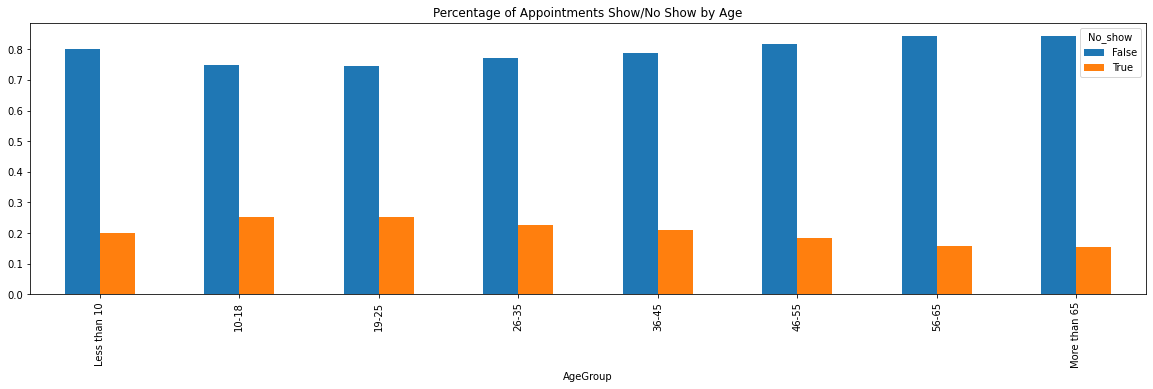

In [40]:
# appointment attendance by age
age = df.groupby('AgeGroup')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))
age.set_title("Percentage of Appointments Show/No Show by Age")
plt.show()

#The patients that seems most likely to not show-up for their appointments are between 10 and 35 years old.

The number of the females whom missed appointments is [14591]
The number of the males whom missed appointments is [7723]


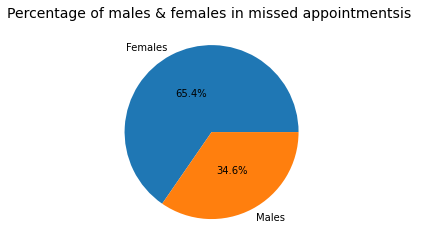

In [41]:
df_gender=df.query("No_show==1")["Gender"] .value_counts()
print("The number of the females whom missed appointments is {}".format(df.query("No_show==1&Gender=='F'")["Gender"] .value_counts().values))
print("The number of the males whom missed appointments is {}".format(df.query("No_show==1&Gender=='M'")["Gender"] .value_counts().values))
#from the below pie chart, we can see that 20% of the appointments are missed
labels=["Females","Males"]
plt.pie(df_gender,autopct='%.1f%%',labels=labels, pctdistance=0.5)
plt.title("Percentage of males & females in missed appointmentsis ", fontsize=14);
plt.show()

From the charts above, we can clearly see that 'Female' patients usually have more appointments that 'Male' patients, they also have about the double number of missed appointment. 
*   65 % of all the total data comes from females and 35% from males. It is clear that females account for more than 50% of all the medical appointments.
*   In light of this fact, we cannot be comparing trends for females and males against each other. This is because the proportion of females is much higher for both the categories as compared to proportion of males.
However, it would be interesting and sensible to view trends among each of the genders (females and males) for the categories namely no show and show up.

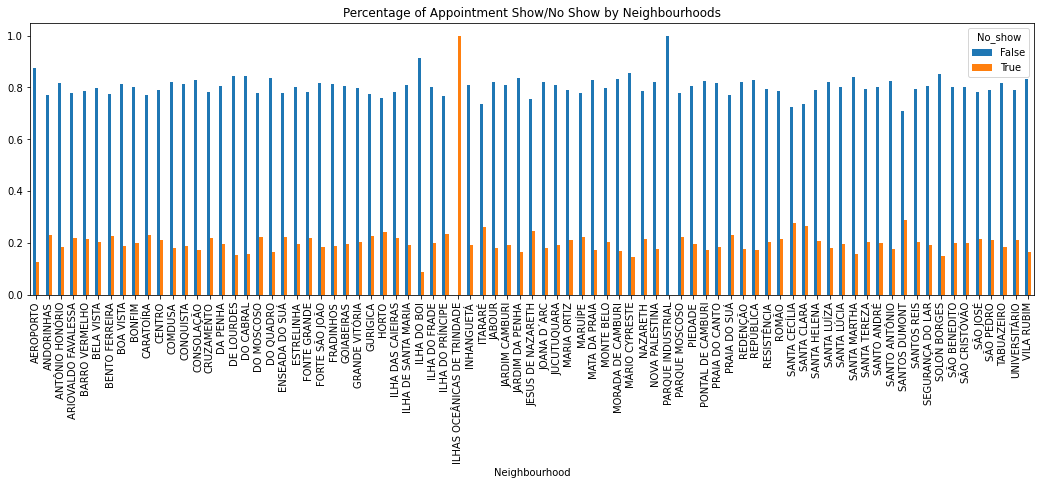

In [42]:
# barchart showing percentage of show/ no-show by Neighbourhoods
day_of_week = df.groupby('Neighbourhood')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(18,5))
day_of_week.set_title("Percentage of Appointment Show/No Show by Neighbourhoods")
plt.show()

Most of the neighbourhouds have a no show rate of about 20%, the significant drops and peaks are because of the poor representation of a particalar neigbourhood in the dataset rather than because it is significant. Therefore, this feature does not seem to be important for the no show prediction.

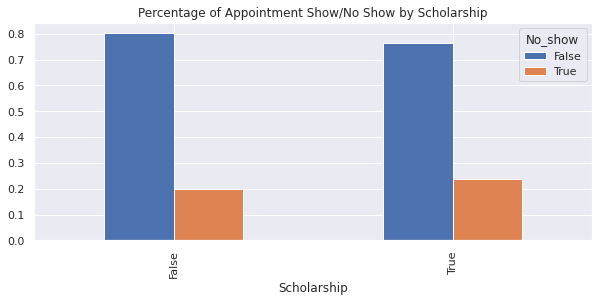

In [67]:
# barchart showing the percentage of show/ no-show by Scholarship
day_of_week = df.groupby('Scholarship')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by Scholarship")
plt.show()


The graphs above shows that 80% of the patients that do not have a scholarship attended their appointent while 75% of the patient with a scholarship attended. This feature could be helpful in dertermining the no show.

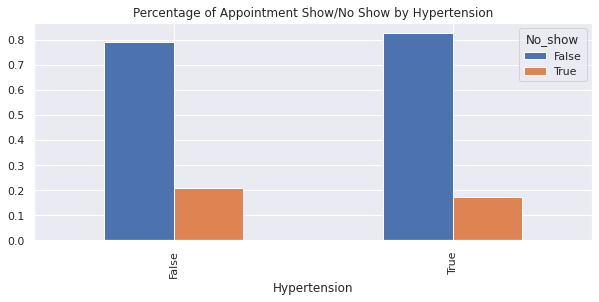

In [68]:
# barchart showing the percentage of show/ no-show by Hypertension
day_of_week = df.groupby('Hypertension')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by Hypertension")
plt.show()

The patients suffering from hypertension tend to attend their appointment more often than those who do not have this condition. However, appointment with hypertension patients represent a small pool in our dataset, just under 20% of the total appointments. This feature could be helpful in dertermining the no show:

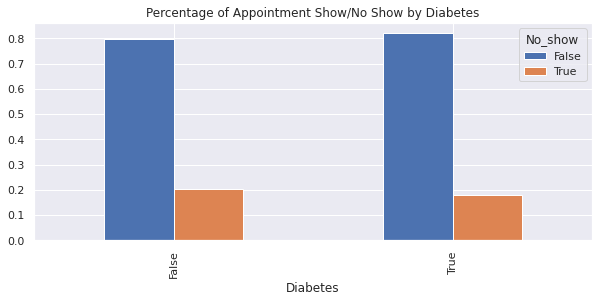

In [69]:
# barchart showing the percentage of show/ no-show by Diabetes
day_of_week = df.groupby('Diabetes')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by Diabetes")
plt.show()

The patients suffering from Diabetes tend to attend their appointment more often than those who do not have this condition. This feature may not be helpful in dertermining the no show.

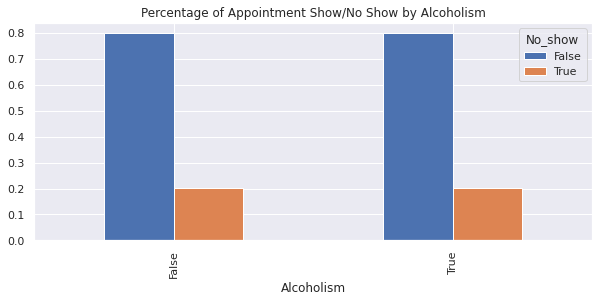

In [70]:
# barchart showing the percentage of show/ no-show by Alcoholism
day_of_week = df.groupby('Alcoholism')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
day_of_week.set_title("Percentage of Appointment Show/No Show by Alcoholism")
plt.show()

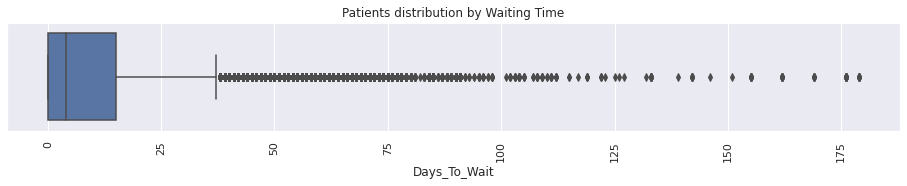

In [73]:
# calculate the number of days the booking has been taken before the appointmenet
# Look at the distribution of Waiting days
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_age = sns.boxplot(x=df.Days_To_Wait)
dist_age.set_title("Patients distribution by Waiting Time")
plt.show()

Most of the appointments are taken a month in advance. The graph above, highlights erroneous data and outliers.

# CONCLUSION

*   There was no direct correlation between most of the independent variables and the no-show rate.
*   Investigation for the for the gender didn't show any affects either.
*   The highest correlation was with the SMS_received variable and later in the findings it was clear why this correlation might have existed.
*   For the neighbouhoods, most of them are around the mean except for a few outliers that will require further external investigation to understand the reasons of these rates.
*   Exploring the time difference between the scheduling and appointment date, it was clear that the longer the duration the higher the chance of the patient not showing up, also it
 seems that the SMSs are not that effective as they didn't solve the problem on no-shows.
*   Contrary to what is expected, patients with scholarship have higher proportions of no show than show up and patients without scholarship have a slightly higher proportion of show up than no show. Scholarship program doesn't seem to be effective in encouraging patients to show up for their medical appointments.
*  Patients with either of the conditions namely hypertension or diabetes or handicap have higher proportions of show up than no show as compared to patients without these conditions. This is an indication of increased awareness and proactiveness in the society about the treatment for these medical conditons.



